# Introduction

Since ancient times, wine has been a central part of human culture, leisure, and diet. Everything from wine-making to wine-tasting has a certain art to it, and each region has its own unique wine culture. Consumers select higher quality wine to savor and appreciate in moderation. 

The questions we would like to explore are: What factors affect wine quality rating? How do the factors affecting wine quality differ between red and white wines? Can the type of wine be predicted based on quantitative chemical properties?

These research questions are relevant because they investigate a commonly consumed beverage in society. While most people tend to choose their wine based on factors such as price and taste, it may be beneficial to explore other qualities like pH and acidity so that consumers can make more informed decisions about their purchases.

# Data

We are using two Kaggle datasets on wine quality; one for [red wine](https://www.kaggle.com/yasserh/wine-quality-dataset) and the other for [white](https://www.kaggle.com/piyushagni5/white-wine-quality). 

The data were collected between May 2004 and February 2007 for a paper on modeling and data mining wine preferences [1]. The wine comes from northern Portugal and is called *Vinho Verde*. Due to privacy, only "physicochemical" variables (chemical characteristics such as pH, sulfate content, etc) along with determined wine quality are available.

In the two datasets, there are parallel variables such as fixed acidity, citric acid, and residual sugar that all could act as interesting factors in our analysis. In this project, we will analyze the intersection of and map the connections between those variables to see how they impact the overall quality of red and white wines (which have been provided as a score between 0 to 10). We are also comparing two different types of wine, which is uniquely interesting because we can map the differences between the datasets and obtain a more complex and meaningful analysis than with just one dataset. Lastly, we are simply curious about wine, so we are interested to learn more about what makes a good quality wine!

1. P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

# Results and Methods

We first read in our red wine and white wine datasets, assigned them into their respective DataFrame objects, and merged the datasets together using an outer join. Below is our initial exploratory data analysis that depicts the relationships between several variables in our merged dataset.

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
url_red = "https://raw.githubusercontent.com/MadeleineJones/CS216_Project/main/winequality-red.csv"
url_white = "https://raw.githubusercontent.com/MadeleineJones/CS216_Project/main/winequality-white.csv"

red = pd.read_csv(url_red)
white = pd.read_csv(url_white)

In [ ]:
red["type"] = "red"
white["type"] = "white"
print(red.shape[0])
print(white.shape[0])
wine = pd.merge(red, white, how = "outer")
wine.head()

1599
4898


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red


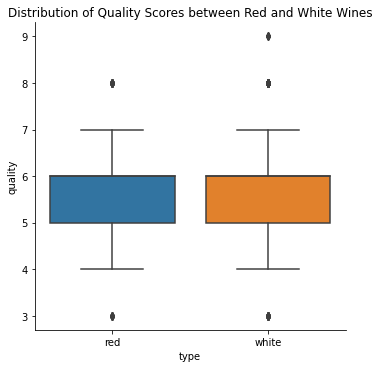

In [ ]:
#EDA 1
sns.catplot(data = wine,
            x = 'type', y = 'quality', kind = "box").set(title = 'Distribution of Quality Scores between Red and White Wines')

From this boxplot, we observe that the quality ratings of red and white wines are very similarly distributed, with white wine having one more outlier than red wine. The minimum rating is 4, the maximum rating is 7, and the IQR is 5-6 for both types of wine.

[Text(0.5, 1.0, 'Quality vs Sulphates')]

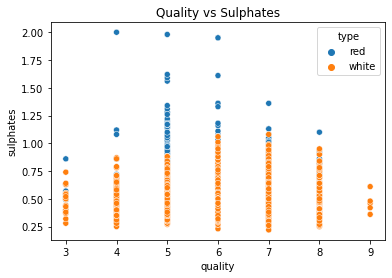

In [ ]:
#EDA 2
sns.scatterplot(data = wine, x = "quality", y = "sulphates", hue = "type").set(title = 'Quality vs Sulphates')

This scatterplot of quality vs sulphates shows that white wines tend to have less sulphates than red wine, and that the distribution is approximately normal with a center around 5-6.

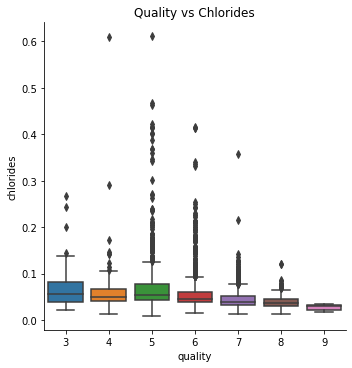

In [ ]:
#EDA 3
sns.catplot(data = wine, x = "quality", y = "chlorides", kind = "box").set(title = 'Quality vs Chlorides')

Finally, from the boxplot of quality vs chlorides, we observe that as the quality rating increases, the amount of chlorides decreases slightly. In addition, there is significant variation in the distribution of chlorides for wines that have quality ratings of 5 and 6.

To answer our research questions, we first conducted a linear regression model for each dataset to explore the relationship between wine quality and all of the physicochemical properties given in the data. After testing multiple combinations of variables and assessing the model fit, we determined that the best predictors of white wine quality were alcohol and citric acid and the best predictors of red wine quality were alcohol, residual sugar, and pH. For our white wine model, we obtained a mean-squared error of 0.635 and an R-squared value of 0.190. While the MSE value is relatively low, meaning that our predictions do not deviate that far from the real values, the R-squared value is close to 0, which indicates that there is little correlation between the variables we're testing. Our results for the red wine model follow a similar pattern, with slight improvement in the accuracy of our model; the MSE is 0.487 (lower than the white wine model) and the R-squared value is 0.253 (higher than the white wine model).

In [ ]:
#Linear reg for factors predicting quality in WHITE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data = white[["alcohol", "citric acid"]].values
target = white["quality"].values

linear_model = LinearRegression()
linear_model.fit(X = data, y = target)
predicted = linear_model.predict(data)

white_mse = mean_squared_error(target, predicted) # float: MSE
white_r2 = r2_score(target, predicted)

print("MSE:", white_mse, "r^2:", white_r2)

MSE: 0.6349679089742609 r^2: 0.19029391204459845


In [ ]:
#Linear reg for factors predicting quality in RED
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

data = red[["alcohol", "residual sugar", "pH"]].values
target = red["quality"].values

linear_model = LinearRegression()
linear_model.fit(X = data, y = target)
predicted = linear_model.predict(data)

q1_mse = mean_squared_error(target, predicted) # float: MSE
q1_r2 = r2_score(target, predicted)

print("MSE:", q1_mse, "r^2:", q1_r2)

MSE: 0.4871890921384391 r^2: 0.2525029326493211


Next, we split our data into a training set and test set, where 65% of the data was the test set. We then trained a logistic regression model on our training set with all twelve of our variables from the merged dataset to predict the wine type (red or white). The classification accuracy of this model is 0.984; despite such a high level of accuracy, we determined that a simpler model would provide a more meaningful analysis and tested various combinations of our predictor variables to obtain a smaller logistic regression model. Our resulting predictors were fixed acidity, volatile acidity, citric acid, residual sugar, and pH. Our accuracy score was 0.948 for this new model. In addition, we plotted a confusion matrix for this model because the interpretation seemed more meaningful as many of the variables in the original model are very similar. 

0.9841382575757576


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


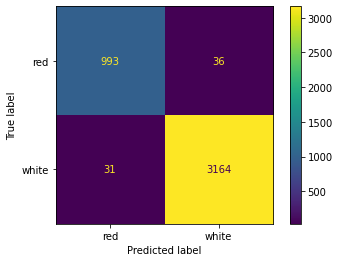

In [ ]:
#Prediction of red or white (all predictors)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

wine_data = wine.drop(columns = ["type"])
wine_target = wine["type"]
wine_train_data, wine_test_data, wine_train_target, wine_test_target = train_test_split(wine_data, wine_target, test_size = 0.65, random_state = 79)

logistic = LogisticRegression(max_iter = 1000)
data = wine_train_data[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
                        "density", "pH", "sulphates", "alcohol", "quality"]]

prediction_data = wine_test_data[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
                        "density", "pH", "sulphates", "alcohol", "quality"]]
logistic.fit(X = data, y = wine_train_target)
predictions = logistic.predict(prediction_data)
score = logistic.score(prediction_data, wine_test_target)
print(score)
#Confusion Matrix
metrics.plot_confusion_matrix(logistic, prediction_data, wine_test_target)

In [ ]:
#Prediction of red or white (what we think would be good predictors)
wine_data = wine.drop(columns = ["type"])
wine_target = wine["type"]
wine_train_data, wine_test_data, wine_train_target, wine_test_target = train_test_split(wine_data, wine_target, test_size = 0.65, random_state = 79)

logistic = LogisticRegression(max_iter = 1000)
data = wine_train_data[["fixed acidity", "volatile acidity","citric acid", "residual sugar", "pH"]]

prediction_data = wine_test_data[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "pH"]]
logistic.fit(X = data, y = wine_train_target)
predictions = logistic.predict(prediction_data)
score = logistic.score(prediction_data, wine_test_target)
print(score)

0.9476799242424242


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


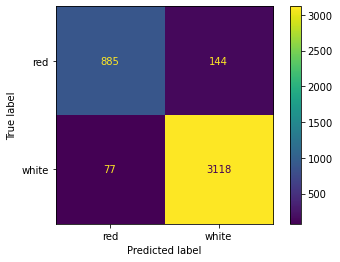

In [ ]:
#Confusion Matrix
metrics.plot_confusion_matrix(logistic, prediction_data, wine_test_target)

In [ ]:
print("Precision:", metrics.precision_score(wine_test_target.values, predictions, pos_label = "white"))
print("Recall:", metrics.recall_score(wine_test_target.values, predictions, pos_label = "white"))
print("F1:", metrics.f1_score(wine_test_target.values, predictions, pos_label = "white"))


Precision: 0.9558553034947884
Recall: 0.9758998435054773
F1: 0.9657735790614838


Our confusion matrix depicts a low number of false positives and false negatives (and correspondingly, a high number of true positives and true negatives). Our model has a precision score of 0.956, which means that out of the wines we predicted would be white, 95.6% were actually white. It has a recall score of 0.976, which means that out of the wines that were actually white, we predicted that 97.6% would be white. Finally, our F1 score is 0.966, which indicates that our model did well on both precision and recall.

# Limitations and Future Work

The datasets we used have a few limitations: a) both datasets are related to varieties of the Portuguese *Vinho Verde* wine, which may limit the generalizability of our findings to a broader context, and b) there are nearly three times as many white wine observations as red wine observations, which impacts our ability to compare the influence of our predictor variables on quality for red vs white wine, as well as our predictions of wine type.

Future work on this project includes expanding our linear regression models to explore the relationship between wine quality and other predictor variables that weren't used in our initial models. Our current R^2 values for both models are relatively low and can very likely be improved upon. In doing so, we can compare multiple linear regression models with different variables to choose the most effective model. Additionally, further research is needed to explore the reason why we obtained a higher accuracy score with our full logistic regression model instead of our simpler model as expected.


# Conclusion
We sought to analyze the chemical factors that affect wine quality and aggregated data collected from May 2004 to February 2007 on red and white *Vinho Verde* wine. In addition to these factors, we were also interested in predicting the wine type (red vs. white) based on physicochemical properties (our data). We primarily used two models: a linear regression model that identifies the factors that best predict wine quality on a scale from 1-10, and a logistic regression model that identifies the factors that best classify the type of wine. Our models reveal that alcohol and citric acid are the best predictors of white wine, and that alcohol, residual sugar, and pH are the best predictors of red wine. Our model assessments resulted in an R^2 of 0.253 for the red wine model and 0.190 for the white wine model, which certainly leaves room for improvement. However, in predicting the type of wine, using variables that we presumed to have to best effect (such as fixed acidity, volatile acidity, citric acid, residual sugar, pH) we achieved an accuracy score of 0.948. Ultimately, this was not better than the model that used every single variable in the dataset to predict the type of wine. This shows that all the variables in the dataset prove important when distinguishing between red and white wine. Overall, this project was really interesting and in our analysis and research, our group learned a lot about wines and data analysis.
